## load packages

In [ ]:
R.version.string

[1] "R version 4.2.0 (2022-04-22)"

In [ ]:
install.packages('devtools')
install.packages('stringr')
install.packages('usmap')
install.packages('wordcloud2')
install.packages('webshot')
install.packages('ggExtra')
install.packages('usmap')
install.packages('missForest')
install.packages('mltools')
install.packages('leaps')
install.packages('tree')
install.packages("pls")
install.packages('GGally')
install.packages('usmap')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘usmapdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘colourpicker’, ‘miniUI’, ‘shiny’, ‘shinyjs’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘randomForest’, ‘foreach’, ‘itertools’, 

In [ ]:
library(stringr)
library(usmap)
library(ggplot2)
library(stringr)
library(usmap)
library(ggplot2)
library(ggExtra)
library(wordcloud2)
library(webshot)
webshot::install_phantomjs()
library(dplyr)
library(GGally)

phantomjs has been installed to /root/bin

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Visualization

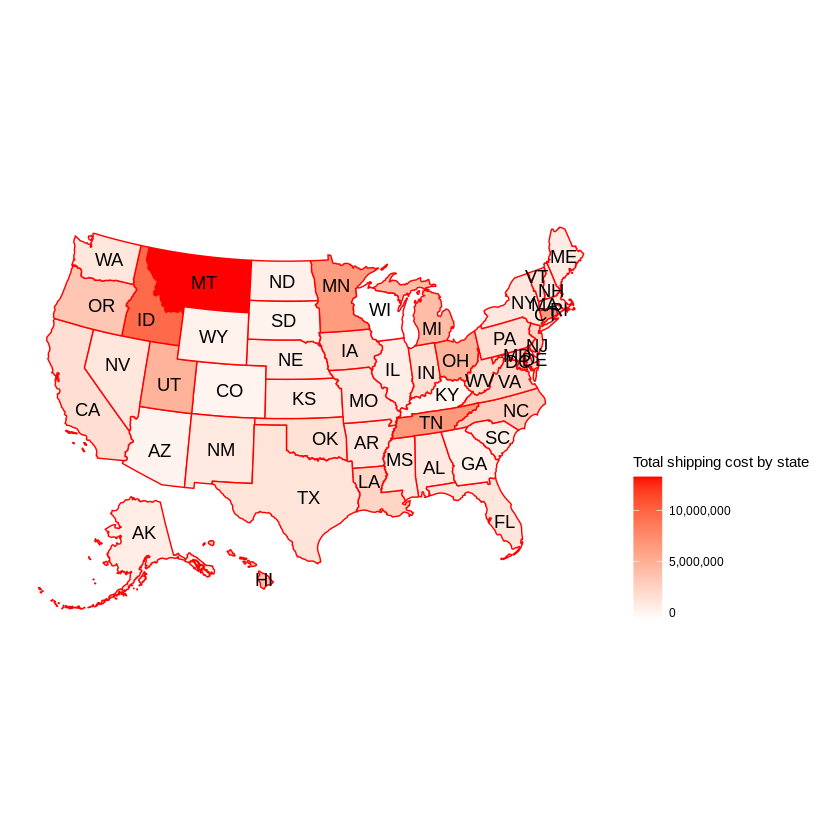

In [ ]:
library(dplyr)
data <- read.csv('train.csv')
zip_c <- str_sub(data$Customer.Location, start= -8, end = -7)
data['state'] = zip_c

states_cost = data%>%group_by(state) %>% summarise(values = sum(Cost))

'%!in%' <- Negate(`%in%`)

x <- subset(states_cost, states_cost$state %!in% c('AA','AE','AP'))

plot_usmap(data=x,values = 'values',
           color = 'red',regions = 'states',
           labels=TRUE)+ 
  scale_fill_continuous(low='white',high='red',
                        name = 'Total shipping cost by state',
                        label = scales::comma)+
  theme(legend.position = 'right') ## plot us_map by shipping cost

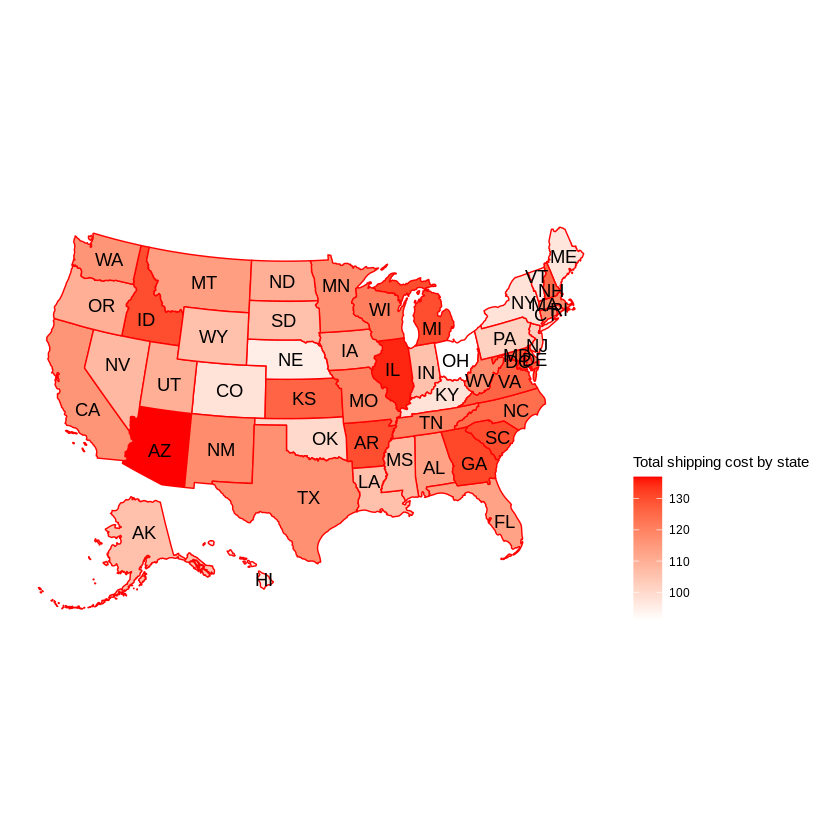

In [ ]:
data <- read.csv('train.csv')
zip_c <- str_sub(data$Customer.Location, start= -8, end = -7)
data['state'] = zip_c

states_cost = data%>%group_by(state) %>% summarise(values = n())

'%!in%' <- Negate(`%in%`)

x <- subset(states_cost, states_cost$state %!in% c('AA','AE','AP'))

plot_usmap(data=x,values = 'values',
           color = 'red',regions = 'states',
           labels=TRUE)+ 
  scale_fill_continuous(low='white',high='red',
                        name = 'Total shipping cost by state',
                        label = scales::comma)+
  theme(legend.position = 'right') ## plot us_map by shipping cost

In [ ]:
#data %>% summarise(count = n_distinct(id))
Freq = data %>% count(Material)
colnames(Freq) = c('word','freq')
my_graph <- wordcloud2(data=Freq, size=1,color='random-dark')

library("htmlwidgets")
saveWidget(my_graph,"tmp.html",selfcontained = F)

# and in png or pdf
webshot("tmp.html","fig_1.pdf", delay =5, vwidth = 480, vheight=480)

ERROR: ignored

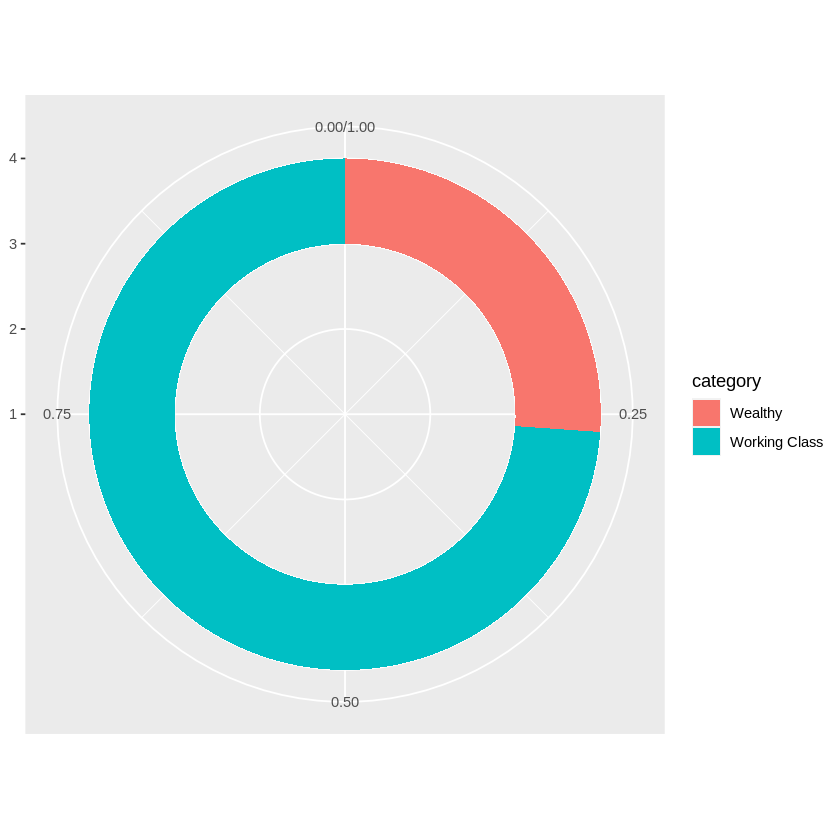

In [ ]:
## donut chart for customer information
cust_info = data %>% count(Customer.Information)
colnames(cust_info) = c('category','count')
cust_info$fraction = cust_info$count / sum(cust_info$count)
cust_info$ymax = cumsum(cust_info$fraction)
cust_info$ymin = c(0, head(cust_info$ymax, n=-1))
ggplot(cust_info, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
     geom_rect() +
     coord_polar(theta="y") + # Try to remove that to understand how the chart is built initially
     xlim(c(1, 4))

Warning message:
“Removed 910 rows containing missing values (geom_point).”


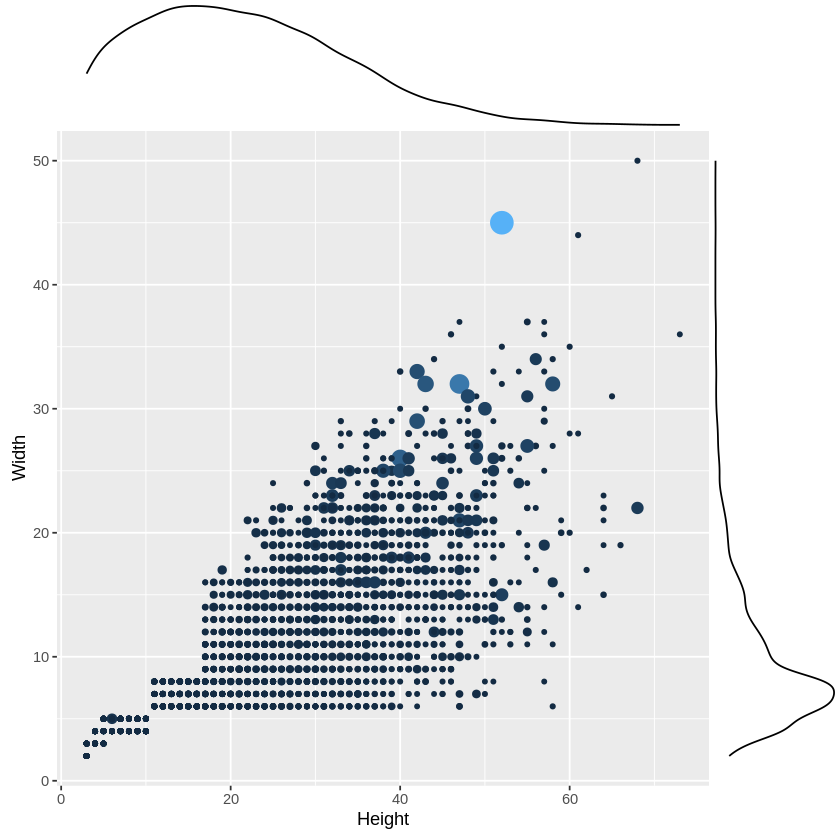

In [ ]:
p <- ggplot(data, aes(x=Height, y=Width, color=Price.Of.Sculpture, size=Price.Of.Sculpture)) +
      geom_point() +
      theme(legend.position="none")
p1 <- ggMarginal(p, type="density")
p1

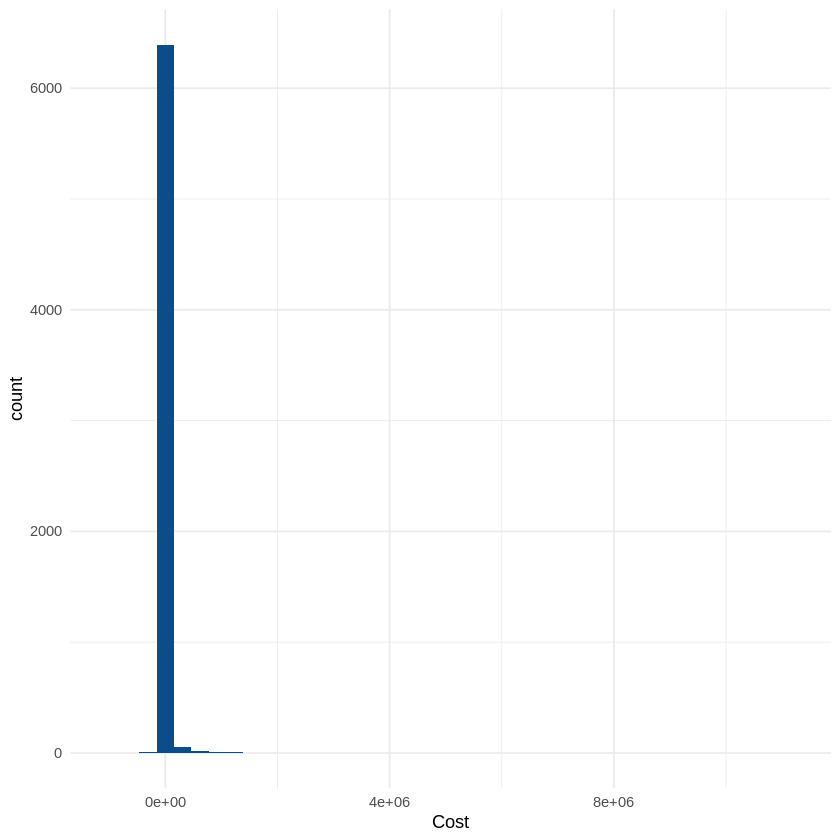

In [ ]:
ggplot(data)+aes(x=Cost)+geom_histogram(bins=40L,fill = "#0c4c8a")+
theme_minimal()

In [ ]:
summary(data)

 Customer.Id        Artist.Name        Artist.Reputation     Height     
 Length:5818        Length:5818        Min.   :0.0000    Min.   : 3.00  
 Class :character   Class :character   1st Qu.:0.2400    1st Qu.:12.00  
 Mode  :character   Mode  :character   Median :0.4500    Median :20.00  
                                       Mean   :0.4616    Mean   :21.72  
                                       3rd Qu.:0.6800    3rd Qu.:29.00  
                                       Max.   :1.0000    Max.   :73.00  
                                       NA's   :671       NA's   :336    
     Width            Weight           Material         Price.Of.Sculpture 
 Min.   : 2.000   Min.   :       3   Length:5818        Min.   :     3.00  
 1st Qu.: 6.000   1st Qu.:     496   Class :character   1st Qu.:     5.23  
 Median : 8.000   Median :    3071   Mode  :character   Median :     7.96  
 Mean   : 9.584   Mean   :  325985                      Mean   :   904.03  
 3rd Qu.:12.000   3rd Qu.:   35844  

In [ ]:
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



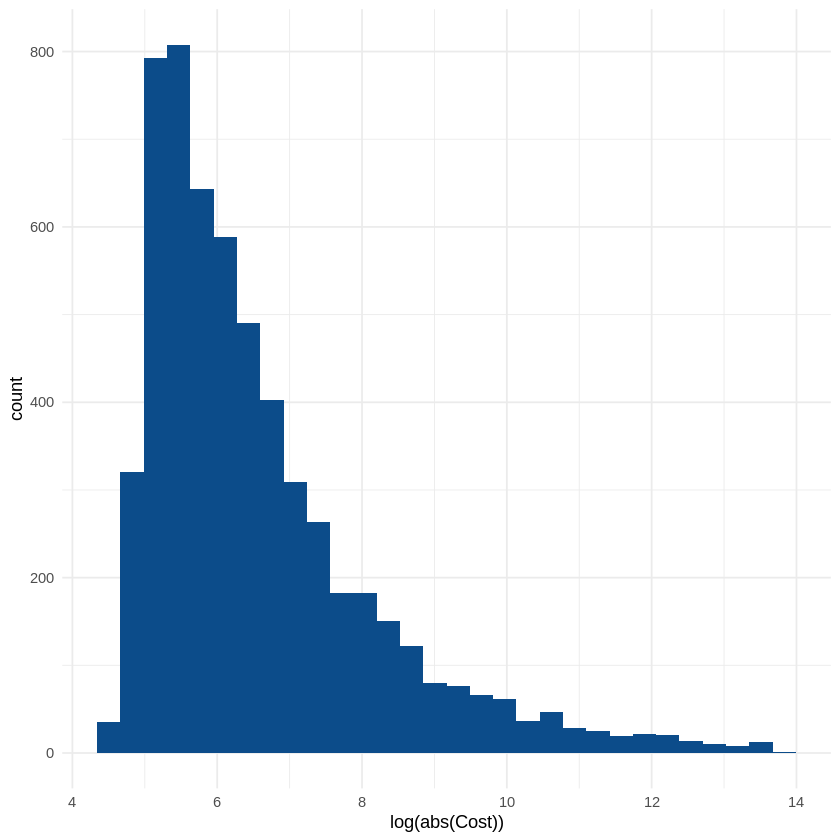

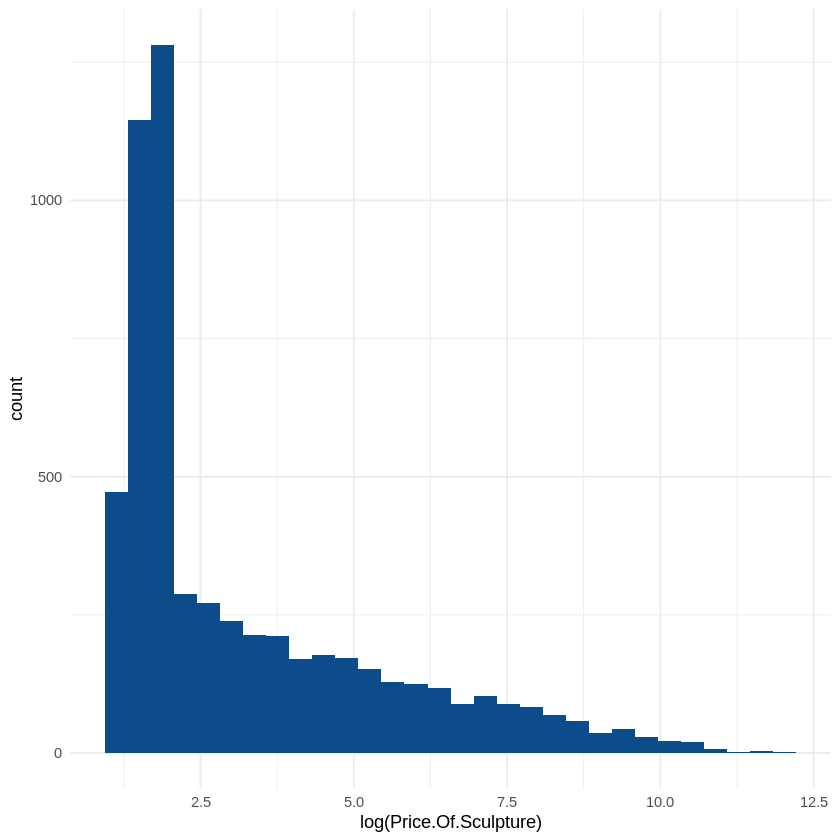

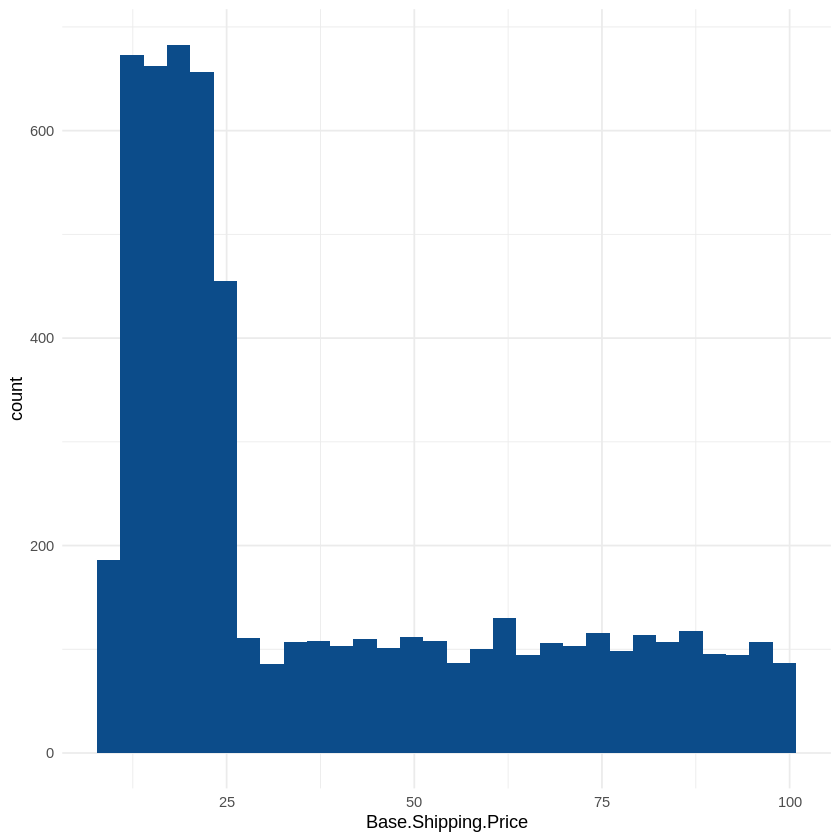

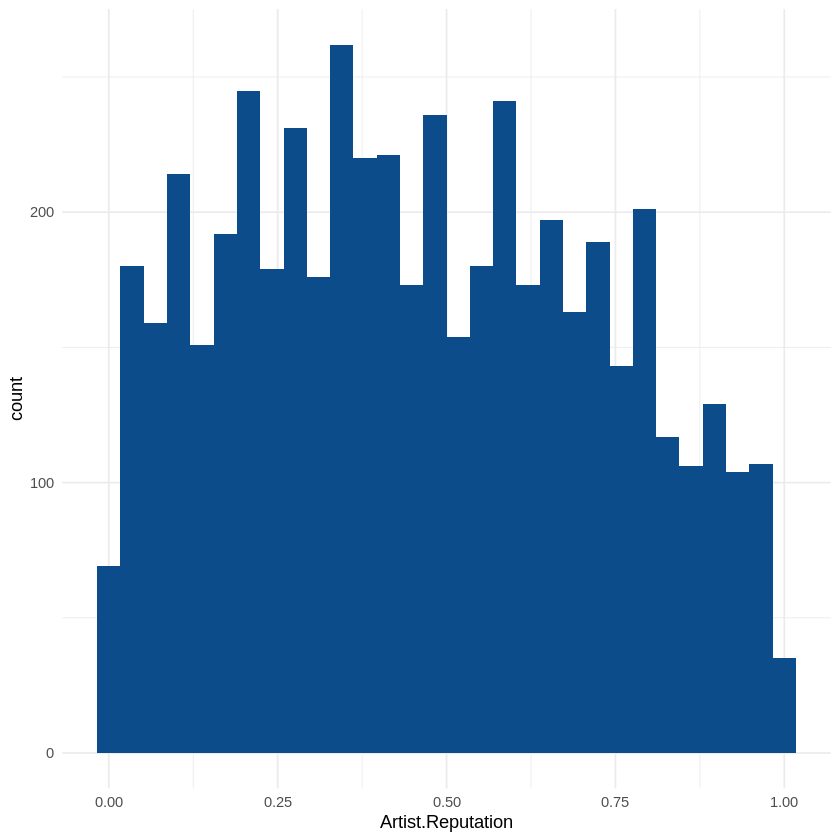

In [ ]:
library(gridExtra)
ggplot(data) +
  aes(x = log(abs(Cost))) +
  geom_histogram(bins = 30L, fill = "#0c4c8a") +
  theme_minimal()
ggplot(data) +
  aes(x = log(Price.Of.Sculpture)) +
  geom_histogram(bins = 30L, fill = "#0c4c8a") +
  theme_minimal()
ggplot(data) +
  aes(x = Base.Shipping.Price) +
  geom_histogram(bins = 30L, fill = "#0c4c8a") +
  theme_minimal()
ggplot(data) +
  aes(x = Artist.Reputation) +
  geom_histogram(bins = 30L, fill = "#0c4c8a") +
  theme_minimal()
  


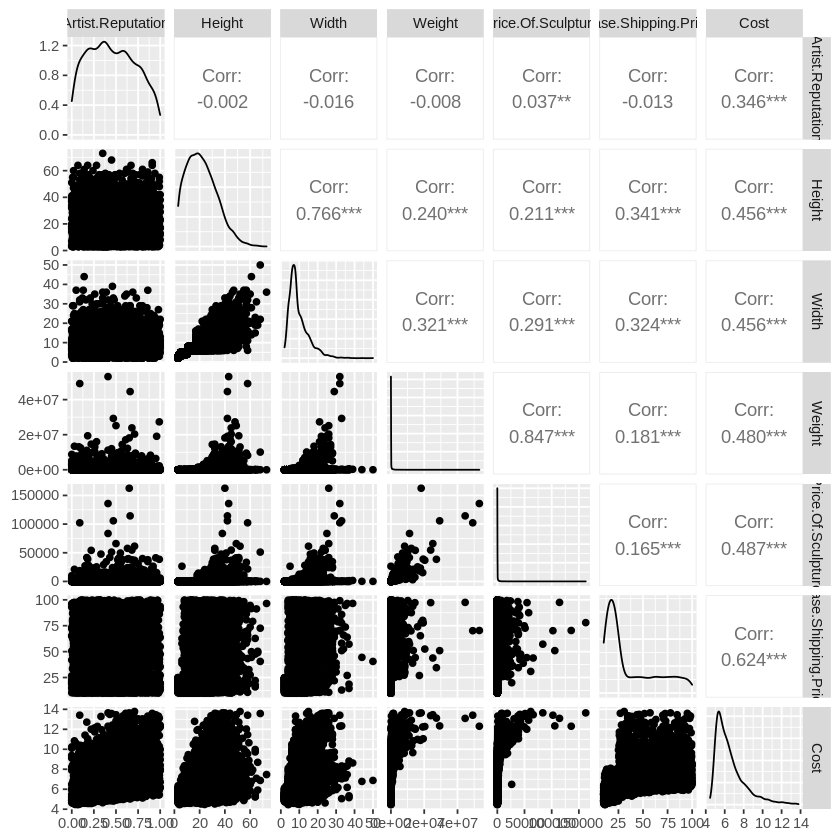

In [ ]:
data$Cost = log(abs(data$Cost))

l1 = colnames(as.matrix(select_if(data, is.numeric)))

ggpairs(data[,l1])

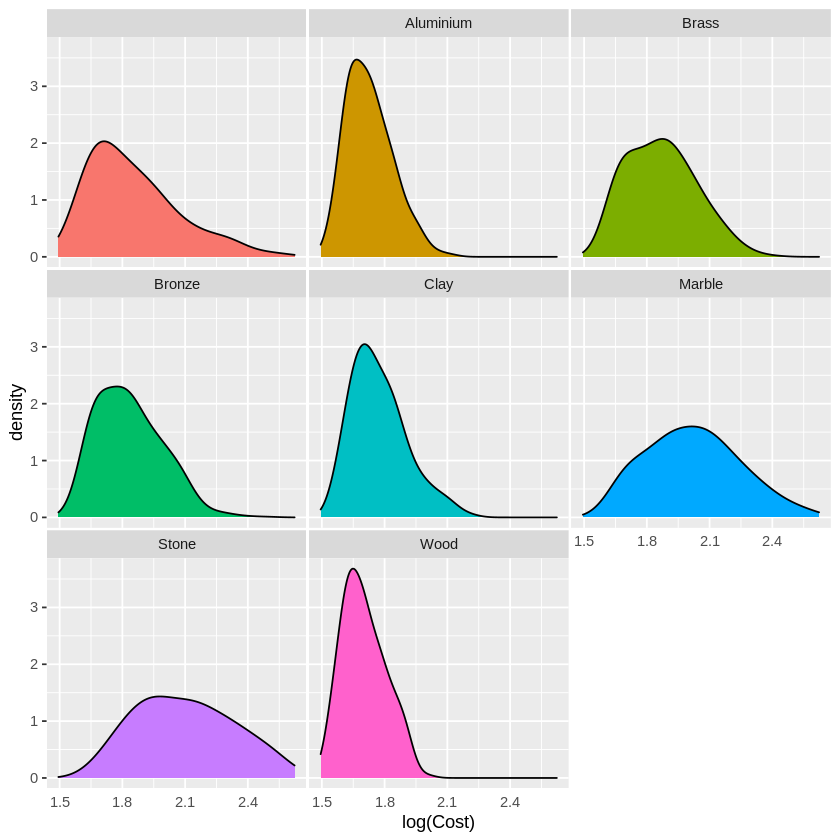

In [ ]:
ggplot(data, aes(x=log(Cost), group=Material, fill=Material)) +
    geom_density(adjust=1.5) +
    # theme_ipsum() +
    facet_wrap(~Material) +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      axis.ticks.x=element_blank()
    )

In [ ]:
# distribution of columns
# ggplot(data = data[data$Weight<1e4,], aes(x=Weight)) +  geom_histogram(position="identity") + scale_color_grey()+scale_fill_grey()+theme_classic()
hist(data[data$Weight<1e4,]$Weight, breaks = 40)
hist(data[(data$Weight>1e6 & data$Weight<4e7),]$Weight, breaks = 30)
hist(data[data$Price.Of.Sculpture<20,]$Price.Of.Sculpture)
hist(data[(data$Cost<100000 & data$Cost>0),]$Cost)

In [ ]:
# factors vs response
library(ggplot2)
p1 <- ggplot(data[(data$Cost<1e5 & data$Cost>-1e5),], aes(x=Material, y=Cost)) + geom_boxplot()
p2 <- ggplot(data[(data$Cost<1e5 & data$Cost>-1e5),], aes(x=Customer.Information, y=Cost)) + geom_point()
p3 <- ggplot(data[(data$Cost<1e5 & data$Cost>-1e5),], aes(x=Transport, y=Cost)) + geom_point()
p4 <- ggplot(data[(data$Cost<1e5 & data$Cost>-1e5),], aes(x=Remote.Location, y=Cost)) + geom_point()
p1 + p2 + p3 + p4

ERROR: ignored

In [ ]:
## precheck of data for negative values
df <- read.csv('train.csv')
sum(df$Cost < 0)
sum(df$Artist.Reputation < 0 )
sum(df$Price.Of.Sculpture < 0)
sum(df$Weight <0 )
sum(df$Width < 0 )
sum(df$Height < 0)

## Feature Engineering & Missing Value Imputation

missing first then new variables 

In [ ]:
library(dplyr)
library(lubridate)

## load and convert data set
df <- read.csv('train.csv')
drop_cols = c('Customer.Id', "Artist.Name") # not informative columns
myvars = names(df) %in% drop_cols
df = df[!myvars]
df[df == ""] <- NA

df$Delivery.Date <- as.Date(df$Delivery.Date, format =  "%m/%d/%Y") # convert to date
df$Scheduled.Date <- as.Date(df$Scheduled.Date, format =  "%m/%d/%Y")
df$date_diff <- as.numeric(df$Delivery.Date - df$Scheduled.Date) ## calculate date difference

data <- mutate_if(df, is.character, as.factor) # convert chr to factor

sapply(select_if(data, is.factor), n_distinct) # count unique value of factor columns
apply(is.na(data), 2, sum)  # check missing values


Material         International      Express.Shipment 
                    8                     2                     2 
Installation.Included             Transport               Fragile 
                    2                     4                     2 
 Customer.Information       Remote.Location     Customer.Location 
                    2                     3                  6500

Artist.Reputation                Height                 Width 
                  750                   375                   584 
               Weight              Material    Price.Of.Sculpture 
                  587                   764                     0 
  Base.Shipping.Price         International      Express.Shipment 
                    0                     0                     0 
Installation.Included             Transport               Fragile 
                    0                  1392                     0 
 Customer.Information       Remote.Location        Scheduled.Date 
                    0                   771                     0 
        Delivery.Date     Customer.Location                  Cost 
                    0                     0                     0 
            date_diff 
                    0

In [ ]:
## feature engineering on the whole data set
data <- data[data$Cost > 0,] ## remove 659 obs with negative shipping cost.
data <- data %>% ## take log to shrink extreme values
  mutate(#Weight = log(Weight),
         #Price.Of.Sculpture = log(Price.Of.Sculpture),
         Cost = log(abs(Cost)))

data = as.data.frame(data)

In [ ]:
dim(data)

[1] 5841   19

In [ ]:
## spilt data
set.seed(1)
train_ind <- sample(nrow(data), floor(0.8*nrow(data))) ## 80% 20%
train <- data[train_ind,]
test <- data[-train_ind,]

In [ ]:
apply(is.na(data),2,sum)

Artist.Reputation                Height                 Width 
                  750                   375                   584 
               Weight              Material    Price.Of.Sculpture 
                  587                   764                     0 
  Base.Shipping.Price         International      Express.Shipment 
                    0                     0                     0 
Installation.Included             Transport               Fragile 
                    0                  1392                     0 
 Customer.Information       Remote.Location        Scheduled.Date 
                    0                   771                     0 
        Delivery.Date     Customer.Location                  Cost 
                    0                     0                     0 
            date_diff 
                    0

In [ ]:
## replace numerical missing value w/ median
## label replaced columns
train1 <- train %>% 
  mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm = T), x))
test1 <- test %>% 
  mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm = T), x))

In [ ]:
install.packages('missForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## using missforest to impute missing categorical variables without imputed values
set.seed(2)
library(missForest)

num_cols = c("Delivery.Date",'Scheduled.Date','Customer.Location','State',
            'Artist.Reputation','Height','Weight','Width')

data1 <- data[,!(names(data) %in% num_cols)]
train <- data1[train_ind,]
test <- data1[-train_ind,]

train_missF <- missForest(as.data.frame(train), maxiter=5, ntree=200)
train_missF <- train_missF$ximp
test_missF <- missForest(as.data.frame(test), maxiter=5, ntree=200)
test_missF <- test_missF$ximp


In [ ]:
train <- cbind(train1[,c('Artist.Reputation','Height','Weight','Width','Customer.Location')],train_missF)
test <- cbind(test1[,c('Artist.Reputation','Height','Weight','Width','Customer.Location')],test_missF)

In [ ]:
## check for missing values
sum(is.na(train))
sum(is.na(test))

[1] 0

[1] 0

In [ ]:
colnames(train)

[1] "Artist.Reputation"     "Height"                "Weight"               
 [4] "Width"                 "Customer.Location"     "Material"             
 [7] "Price.Of.Sculpture"    "Base.Shipping.Price"   "International"        
[10] "Express.Shipment"      "Installation.Included" "Transport"            
[13] "Fragile"               "Customer.Information"  "Remote.Location"      
[16] "Cost"                  "date_diff"

In [ ]:
## now create new variable with complete dataset

library(stringr)
## add avg ship price group by transport and remote
train <- train %>% 
  group_by(Transport, Remote.Location) %>%
  mutate(AvgShipPriceGrpByTransportRemote = mean(Base.Shipping.Price))

test <- test %>% 
  group_by(Transport, Remote.Location) %>%
  mutate(AvgShipPriceGrpByTransportRemote = mean(Base.Shipping.Price))

## add avg ship price group by material
train <- train %>% 
  group_by(Material) %>%
  mutate(AvgShipPriceGrpByMaterial = mean(Base.Shipping.Price))

test <- test %>% 
  group_by(Transport, Remote.Location) %>%
  mutate(AvgShipPriceGrpByMaterial = mean(Base.Shipping.Price))

## add avg ship price group by state
train <- train %>% 
  mutate(State = word(Customer.Location, -2, sep = ' ')) %>% # extract state
  group_by(State) %>% 
  mutate(AvgShipPricePerState = mean(Base.Shipping.Price))

test <- test %>% 
  mutate(State = word(Customer.Location, -2, sep = ' ')) %>%
  group_by(State) %>% 
  mutate(AvgShipPricePerState = mean(Base.Shipping.Price))

## add weight per shipping and volumn
train <- train %>%
  mutate(WeightPerShipping = Weight/Base.Shipping.Price) %>%
  mutate(Volume = (Height**2) * Width)

test <- test %>%
  mutate(WeightPerShipping = Weight/Base.Shipping.Price) %>%
  mutate(Volume = (Height**2) * Width)

data_new <- rbind(train, test)

In [ ]:
data <- as.data.frame(data_new) %>% select(-c('State','Customer.Location')) %>% mutate_if(is.numeric, function(x) scale(x) %>% as.vector()) %>% mutate_if(is.factor,as.numeric)

In [ ]:
write.csv(data, file = "data4model.csv") # save cleaned data as a csv file for modle fitting

In [ ]:
dim(train)
dim(test)

[1] 4672   23

[1] 1169   23

In [ ]:
dim(data)
summary(data)

## Feature selection on complete dataset

In [ ]:
df1 <- data ## make a copy of dataset

In [ ]:
colnames(df1)
length(colnames(df1))

[1] "Artist.Reputation"                "Height"                          
 [3] "Weight"                           "Width"                           
 [5] "Material"                         "Price.Of.Sculpture"              
 [7] "Base.Shipping.Price"              "International"                   
 [9] "Express.Shipment"                 "Installation.Included"           
[11] "Transport"                        "Fragile"                         
[13] "Customer.Information"             "Remote.Location"                 
[15] "Cost"                             "date_diff"                       
[17] "AvgShipPriceGrpByTransportRemote" "AvgShipPriceGrpByMaterial"       
[19] "AvgShipPricePerState"             "WeightPerShipping"               
[21] "Volume"

[1] 21

In [ ]:
## Best subset selection
## do this before dummy encoding

library(leaps)
regfit.full <- regsubsets(Cost~., data=df1, nvmax=length(df1), intercept=F,method='exhaustive')
reg.summary <- summary(regfit.full)

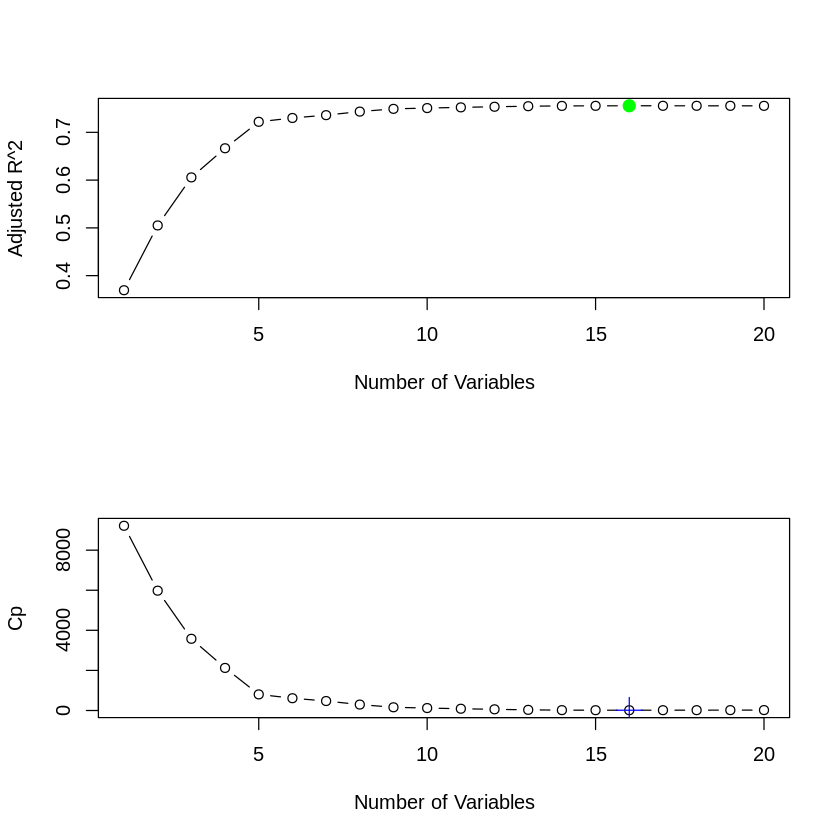

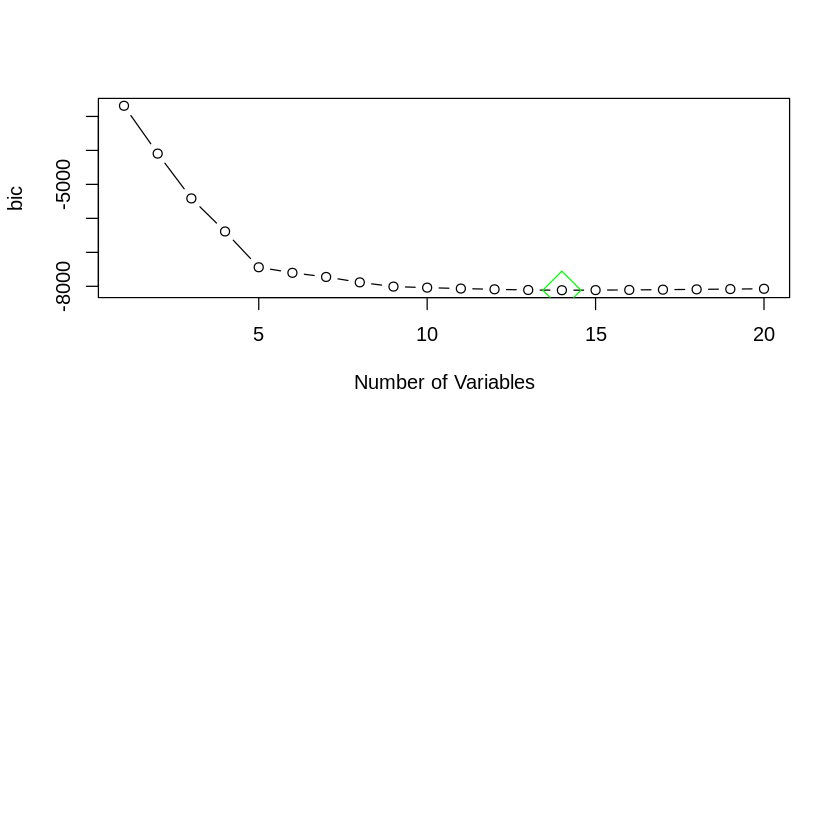

In [ ]:
par(mfrow=c(2,1))
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2", type = "b")
adjr2.max <- which.max(reg.summary$adjr2)
points(adjr2.max, reg.summary$adjr2[adjr2.max], col = "green", pch = 20, cex = 2)

plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "b")
cp.min <- which.min(reg.summary$cp)
points(cp.min,reg.summary$cp[cp.min],col='blue',pch = 3, cex=2)

plot(reg.summary$bic, xlab = "Number of Variables", ylab = "bic", type = "b")
BIC.min <- which.min(reg.summary$bic)
points(BIC.min,reg.summary$bic[BIC.min],col = 'green',pch=5,cex=3)

## use first all features maybe for analysis

In [ ]:
#which.max(reg.summary$adjr2)
reg.summary$which[which.max(reg.summary$adjr2),]
best1 <- c('Artist.Reputation','Height','Weight','Width','Material','Price.Of.Sculpture','Base.Shipping.Price',
'International','Installation.Included','Transport','Fragile','Customer.Information','date_diff','AvgShipPriceGrpByMaterial',
'Volume','Cost')

Artist.Reputation                           Height 
                            TRUE                             TRUE 
                          Weight                            Width 
                            TRUE                             TRUE 
                        Material               Price.Of.Sculpture 
                            TRUE                             TRUE 
             Base.Shipping.Price                    International 
                            TRUE                             TRUE 
                Express.Shipment            Installation.Included 
                           FALSE                             TRUE 
                       Transport                          Fragile 
                            TRUE                             TRUE 
            Customer.Information                  Remote.Location 
                            TRUE                            FALSE 
                       date_diff AvgShipPriceGrpByTransportRemote 
                            TRUE                            FALSE 
       AvgShipPriceGrpByMaterial             AvgShipPricePerState 
                            TRUE                             TRUE 
               WeightPerShipping                           Volume 
                           FALSE                             TRUE

In [ ]:
install.packages('caret')
install.packages('glmnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages('glmnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘RcppEigen’




Loading required package: Matrix

Loaded glmnet 4.1-4



Min Lambda:  0.006368606 
 1Sd Lambda:  0.006368606

,s1,names
,<dbl>,<chr>
AvgShipPriceGrpByMaterial,0.32,AvgShipPriceGrpByMaterial
Artist.Reputation,0.31,Artist.Reputation
Base.Shipping.Price,0.28,Base.Shipping.Price
Height,0.25,Height
Price.Of.Sculpture,0.20,Price.Of.Sculpture
Width,0.18,Width
Weight,0.07,Weight
Material,0.04,Material
International,0.03,International


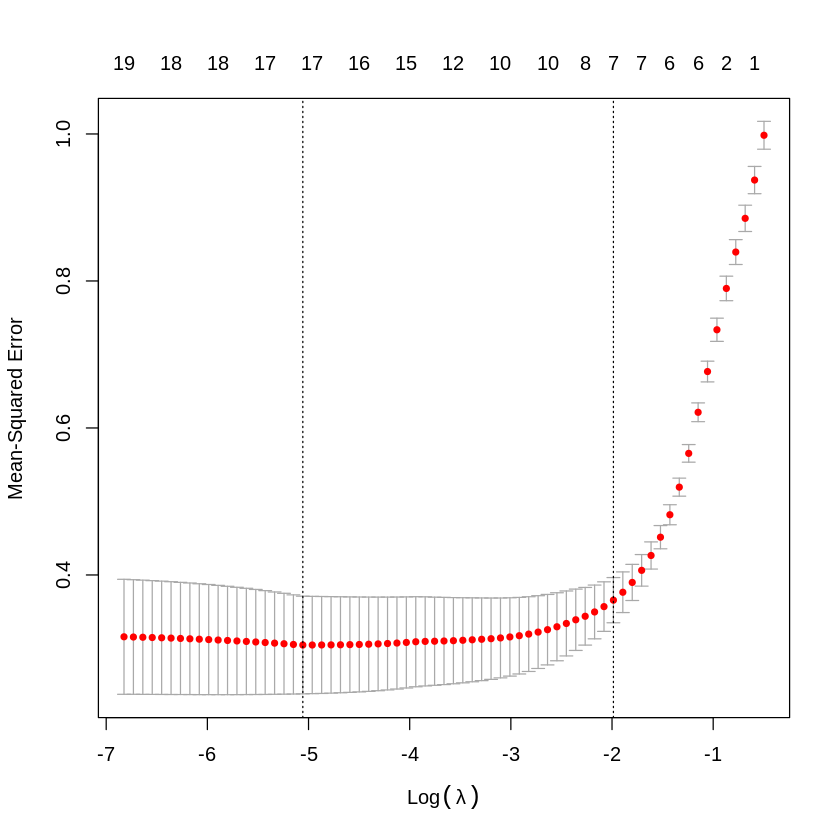

In [ ]:
## using lasso for subset selection
library('caret')
library('glmnet')

x = df1 %>% select(-c('Cost')) %>% data.matrix()
y = df1$Cost

cv.lasso <- cv.glmnet(x,y, family='gaussian',alpha=1, type.measure = 'mse', intercept = F)
cat('Min Lambda: ', cv.lasso$lambda.min, '\n 1Sd Lambda: ', cv.lasso$lambda.min)
df_coef <- data.frame(round(as.matrix(coef(cv.lasso, s=cv.lasso$lambda.min)), 2),names = c('intercept',colnames(x)))
# See all contributing variables
lasso_var <- data.frame(df_coef[df_coef[,1] != 0, ])
lasso_var[order(lasso_var$s1,decreasing = T),]
plot(cv.lasso)
lasso1 <- append(lasso_var$names,'Cost')

From two methods above, we decided to keep variables either for best subset_selection (best1), and lasso result (lasso1)
To keep experimenting in our test set. We used linear model as base function to make decision for us. 

## Model Fitting

In [ ]:
data <- read.csv("data4model.csv")
set.seed(1)
train_ind <- sample(nrow(data), floor(0.8*nrow(data))) ## 80% 20%

### Linear Regression (as a baseline to compare model and variables)

In [ ]:
train = data[train_ind,]
test = data[-train_ind,]

In [ ]:
best1
lasso1

[1] "Artist.Reputation"         "Height"                   
 [3] "Weight"                    "Width"                    
 [5] "Material"                  "Price.Of.Sculpture"       
 [7] "Base.Shipping.Price"       "International"            
 [9] "Installation.Included"     "Transport"                
[11] "Fragile"                   "Customer.Information"     
[13] "date_diff"                 "AvgShipPriceGrpByMaterial"
[15] "Volume"                    "Cost"

[1] "Artist.Reputation"         "Height"                   
 [3] "Weight"                    "Width"                    
 [5] "Material"                  "Price.Of.Sculpture"       
 [7] "Base.Shipping.Price"       "International"            
 [9] "Express.Shipment"          "Installation.Included"    
[11] "Transport"                 "Fragile"                  
[13] "Customer.Information"      "date_diff"                
[15] "AvgShipPriceGrpByMaterial" "AvgShipPricePerState"     
[17] "Volume"                    "Cost"

In [ ]:
setdiff(best1,lasso1)
setdiff(lasso1,best1)

character(0)

[1] "Express.Shipment"     "AvgShipPricePerState"

In [ ]:
## Linear Regression do dummy coding automatically
## linear model with best subset variables
LM = lm(Cost~., data = train[,best1])
pred_lm <- predict(LM)
res = residuals(LM)

## RMSE
predict_lm = predict(LM,test[,best1])
RMSE_base1 = mean((predict_lm-test[,best1]$Cost)^2) ## best subset variables

In [ ]:
## linear model with lasso variables
LM = lm(Cost~., data = train[,lasso1])
pred_lm <- predict(LM)
res = residuals(LM)

## RMSE
predict_lm = predict(LM,test[,lasso1])
RMSE_base2 = mean((predict_lm-test[,lasso1]$Cost)^2) ## lasso variables

In [ ]:
RMSE_base1
RMSE_base2

[1] 0.3814713

[1] 0.3794621

integer(0)

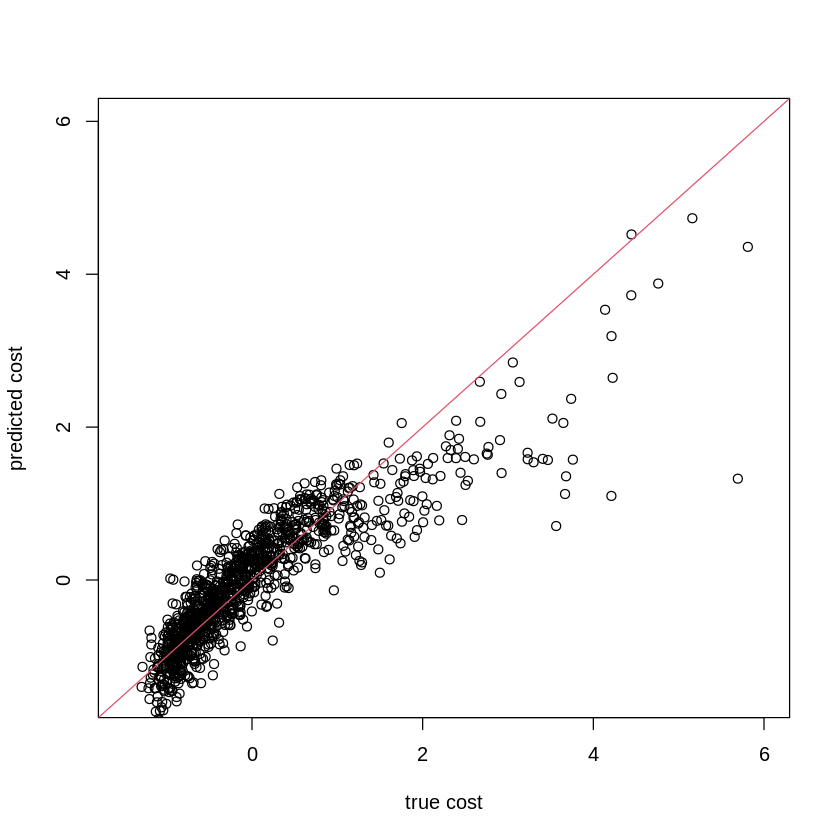

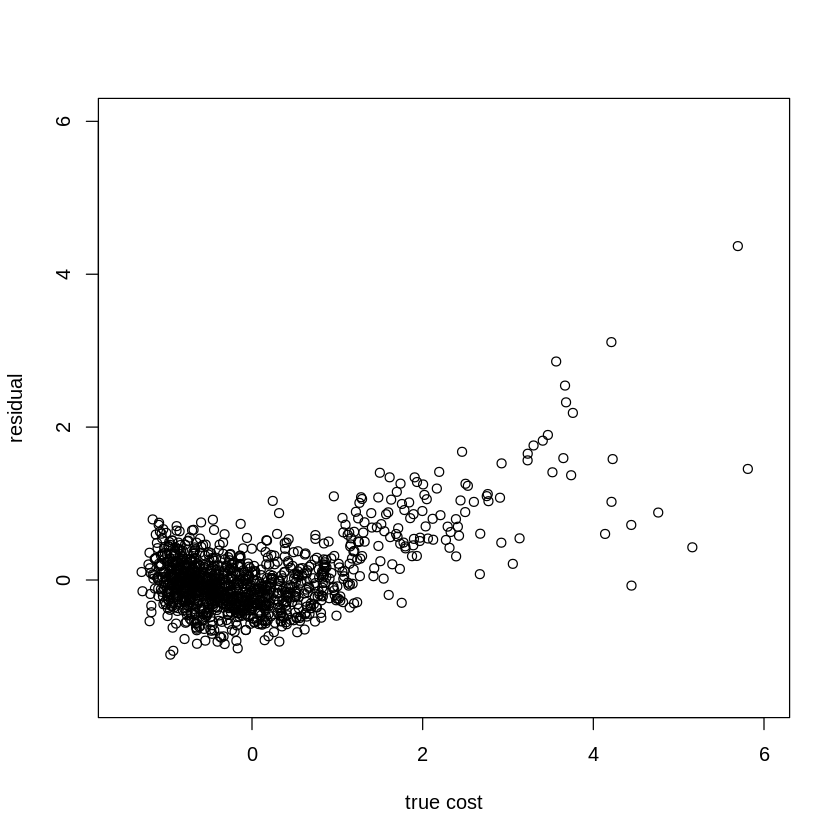

In [ ]:
plot(test[,best1]$Cost, predict_lm, xlim = c(-1.5,6), ylim=c(-1.5,6), xlab = 'true cost', ylab = 'predicted cost')+
abline(0,1,col=2)

plot(test[,best1]$Cost, test[,best1]$Cost-predict_lm, xlim = c(-1.5,6), ylim=c(-1.5,6), xlab = 'true cost', ylab = 'residual')

In [ ]:
train_sub = train[,lasso1]
test_sub = test[,lasso1]

### MARS

In [ ]:
install.packages('earth')

In [ ]:
library(earth)

In [ ]:
data <- read.csv("data4model.csv")
train = data[train_ind,]
test = data[-train_ind,]

In [ ]:
## CV

hyper_grid <- expand.grid(degree = 1:3, nprune = seq(2, 30, length.out = 20) %>% floor())

set.seed(1)

# cross validated model
cv_mars <- train(
  x = subset(train, select = -Cost),
  y = train$Cost,
  method = "earth",
  metric = "RMSE",
  trControl = trainControl(method = "cv", number = 10),
  tuneGrid = hyper_grid
)

,nprune,degree
,<dbl>,<int>
38,27,2


degree,nprune,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,27,0.2354661,0.9422897,0.1494223,0.02679878,0.01664214,0.01018437


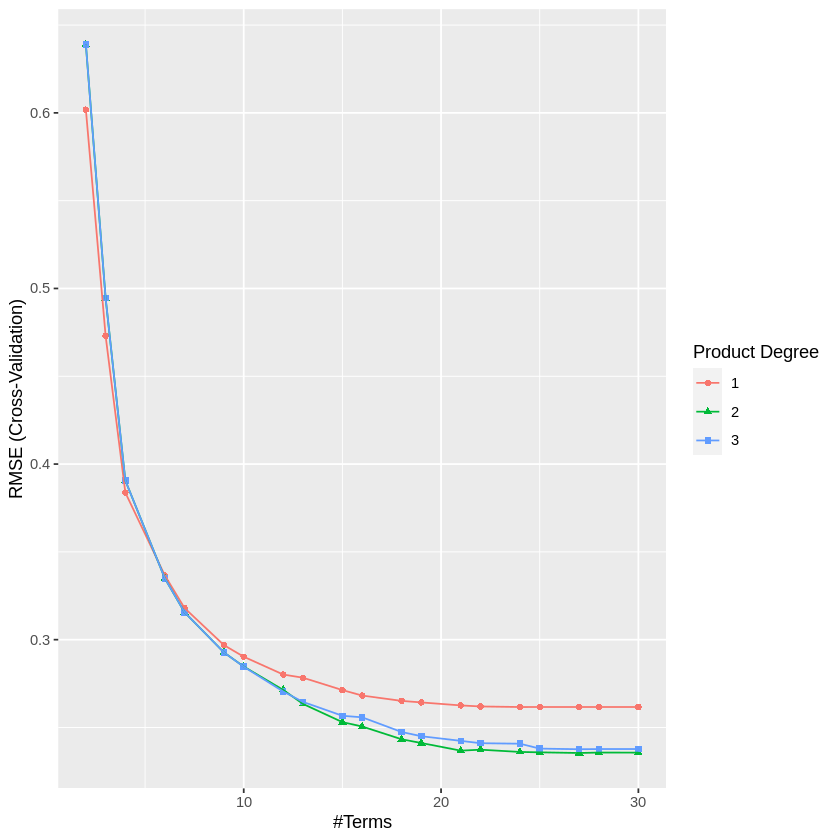

In [ ]:
cv_mars$bestTune # best model

cv_mars$results %>%
  filter(nprune==cv_mars$bestTune$nprune, degree==cv_mars$bestTune$degree)    

ggplot(cv_mars)

In [ ]:
install.packages('vip')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




Selected 25 of 25 terms, and 9 of 21 predictors (nprune=27)
Termination condition: RSq changed by less than 0.001 at 25 terms
Importance: Price.Of.Sculpture, Base.Shipping.Price, Artist.Reputation, ...
Number of terms at each degree of interaction: 1 11 13
GCV 0.05434868    RSS 247.3298    GRSq 0.9451026    RSq 0.9465039

,Cost
(Intercept),5.350639e+00
h(Price.Of.Sculpture-0.2351),1.232735e+01
h(0.2351-Price.Of.Sculpture),-1.545395e+01
h(0.2351-Price.Of.Sculpture)*h(Base.Shipping.Price-0.186483),3.532957e-01
h(0.2351-Price.Of.Sculpture)*h(0.186483-Base.Shipping.Price),-1.384261e+00
h(Artist.Reputation--0.405221),2.436402e-01
h(-0.405221-Artist.Reputation),-2.115612e-01
h(0.2351-Price.Of.Sculpture)*h(WeightPerShipping--0.0903674),5.283104e+00
h(0.2351-Price.Of.Sculpture)*h(-0.0903674-WeightPerShipping),-8.287748e+00
h(Artist.Reputation--0.405221)*h(Height--0.926326),8.442128e-02


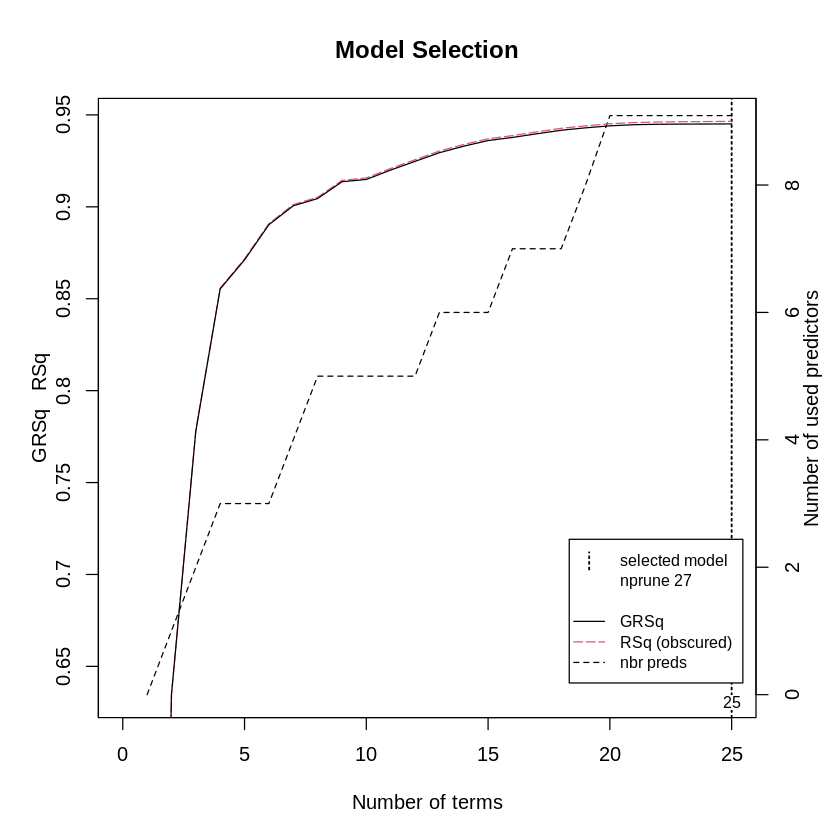

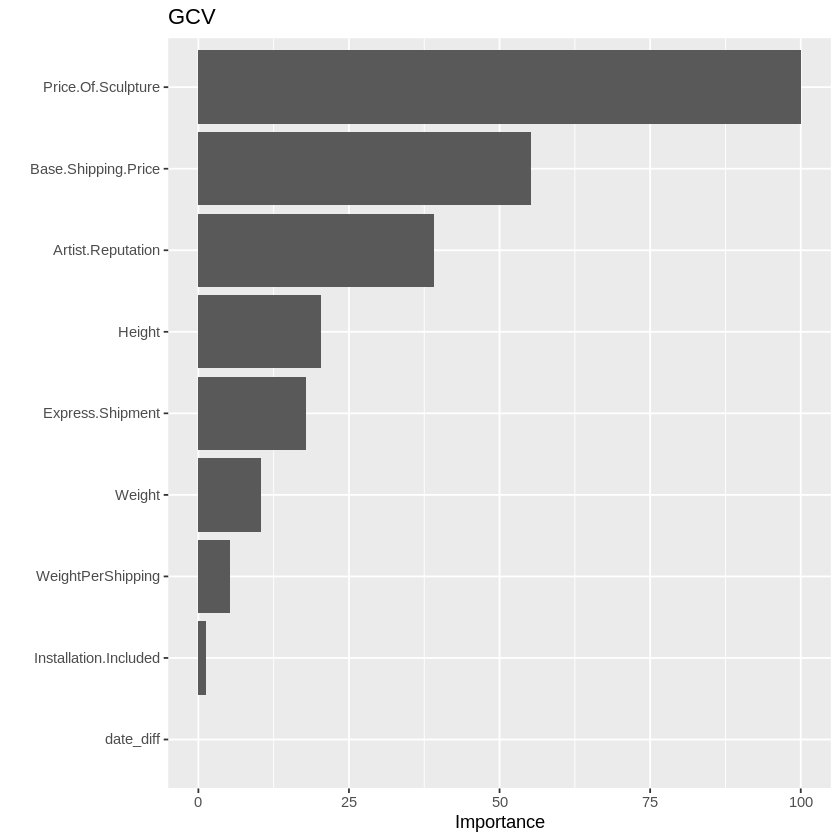

In [ ]:
library(vip)
mars <- earth(Cost ~ ., data = train, degree = 2, nprune = 27) # the best model
mars
summary(mars) %>% .$coefficients %>% head(20)
plot(mars, which = 1)
vip(cv_mars, num_features = 40, bar = FALSE, value = "gcv") + ggtitle("GCV")

In [ ]:
mean(mars$residuals**2) # train MSE

[1] 0.05293874

In [ ]:
predictMars <- predict(mars, subset(test, select = -Cost))
RMSEMars <- mean((predictMars-test$Cost)^2)
RMSEMars

[1] 0.06417262

### Tree

In [ ]:
library(tree)
set.seed(1)
Tree <- tree(Cost~., train)
summary(Tree)
tree.pred <- predict(Tree, test)
err <- mean((tree.pred - test$Cost)^2)
err

set.seed(4)
cv <- cv.tree(Tree)
plot(cv$size, cv$dev, type = "b")

prune <- prune.tree(Tree, best = 7)
plot(prune)
text(prune, pretty = 0)
tree.pred <- predict(prune, test)
err <- mean((tree.pred - test$Cost)^2)

### Hyperparameter Tuning

In [ ]:
## Hyperparameter Tuning

library(tidyverse)
library(tidymodels)
library(rpart.plot)

tree_tune_df = rbind(train, test)

set.seed(123)
tree_split <- initial_split(tree_tune_df, strata = Cost)
tree_train <- training(tree_split)
tree_test <- testing(tree_split)

tree_spec <- decision_tree(
  cost_complexity = tune(),
  tree_depth = tune(),
  min_n = tune()
) %>%
  set_engine("rpart") %>%
  set_mode("regression")

tree_grid <- grid_regular(cost_complexity(), tree_depth(), min_n(), levels = 4)

# 10-fold
tree_folds = vfold_cv(tree_tune_df, v = 10, strata = Cost)

tree_wf <- workflow() %>%
   add_model(tree_spec) %>%
   add_formula(Cost ~ .)

doParallel::registerDoParallel()
set.seed(345)
tree_rs <- tune_grid( # grid search for best hyper-parameter combinations
  tree_spec,
  Cost~ .,
  resamples = tree_folds,
  grid = tree_grid,
  metrics = metric_set(rmse, rsq, mae, mape)
)

collect_metrics(tree_rs)

# get the best tree based on the rmse
best_tree <- tree_rs %>%
  select_best("rmse")

select_best(tree_rs, "rmse")

# finalize the decision tree
final_tree <- finalize_model(tree_spec, select_best(tree_rs, "rmse"))

final_fit <- fit(final_tree, Cost ~ ., tree_train)

final_wf <- 
   tree_wf %>% 
   finalize_workflow(best_tree)

final_fit.plot <- final_wf %>%
   last_fit(tree_split)

final_tree.plot <- extract_workflow(final_fit.plot)

# final_tree.plot %>%
#   extract_fit_engine() %>%
#   rpart.plot(roundint = FALSE)

final_tree.plot %>% 
  extract_fit_parsnip() %>% 
  vip()

# compare train-test prediction error
pred.tree.test <- predict(final_fit, tree_test)
pred.tree.train <- predict(final_fit, tree_train)

rmse.tree.test <- sum((pred.tree.test - tree_test$Cost)^2)/nrow(pred)
rmse.tree.train <- sum((pred.tree.train - tree_train$Cost)^2)/nrow(pred)
rmse.tree.test
rmse.tree.train

### PCR

Data: 	X dimension: 4672 21 
	Y dimension: 4672 1
Fit method: svdpc
Number of components considered: 21

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           0.995   0.7322   0.7184   0.7175   0.6328   0.6201   0.6128
adjCV        0.995   0.7318   0.7177   0.7170   0.6323   0.6197   0.6050
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.6006   0.5920   0.5776    0.5560    0.5335    0.4982    0.4916
adjCV   0.6007   0.5932   0.5817    0.5526    0.5325    0.4978    0.4912
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV       0.4918    0.4915    0.4911    0.4911    0.4912    0.4904    0.4743
adjCV    0.4914    0.4911    0.4908    0.4908    0.4910    0.4899    0.4737
       21 comps
CV       0.4677
adjCV    0.4671

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       17.1

[1] 0.4865618

[1] 0.3395936

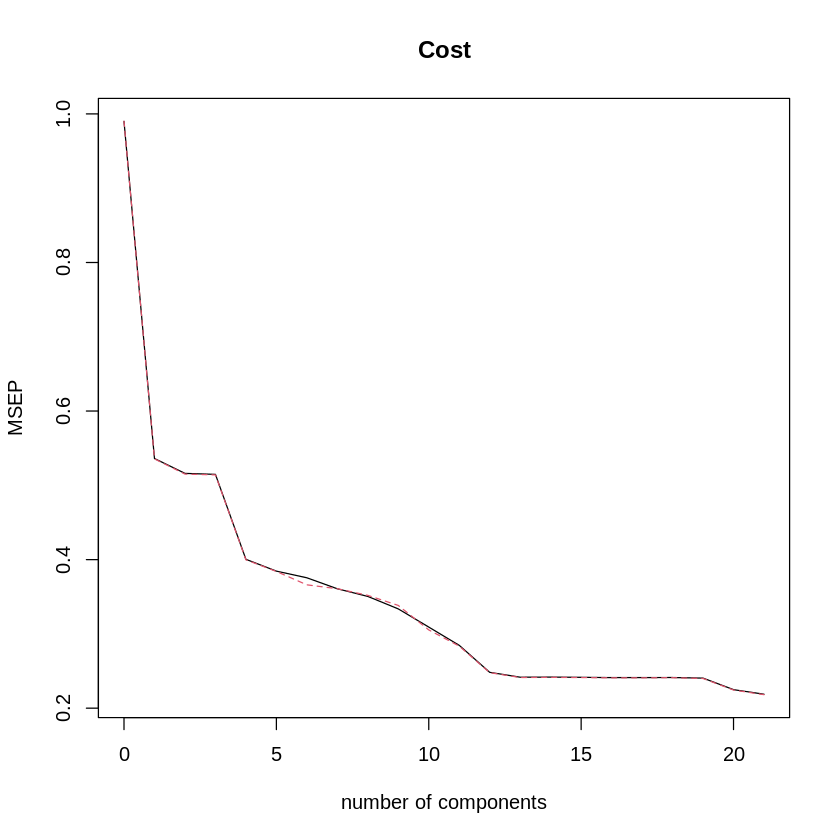

In [ ]:
library(pls)
## Fit
set.seed(1)
pcr.fit = pcr(Cost~., data = train, scale = TRUE, validation = "CV") # 10 fold cross validation errors
summary(pcr.fit) # the CV is the root mean squared error

## Visual
validationplot(pcr.fit, val.type = "MSEP")

## Predict and select M
pcr.pred = predict(pcr.fit, test, ncomp = 16)
pcr.mse = mean((pcr.pred - test$Cost)^2);pcr.mse
pcr.fit.final = pcr(Cost~., data = train, scale = TRUE, ncomp = 16)
mean(pcr.fit.final$residuals**2)

# Random Forest


In [ ]:
library(randomForest)

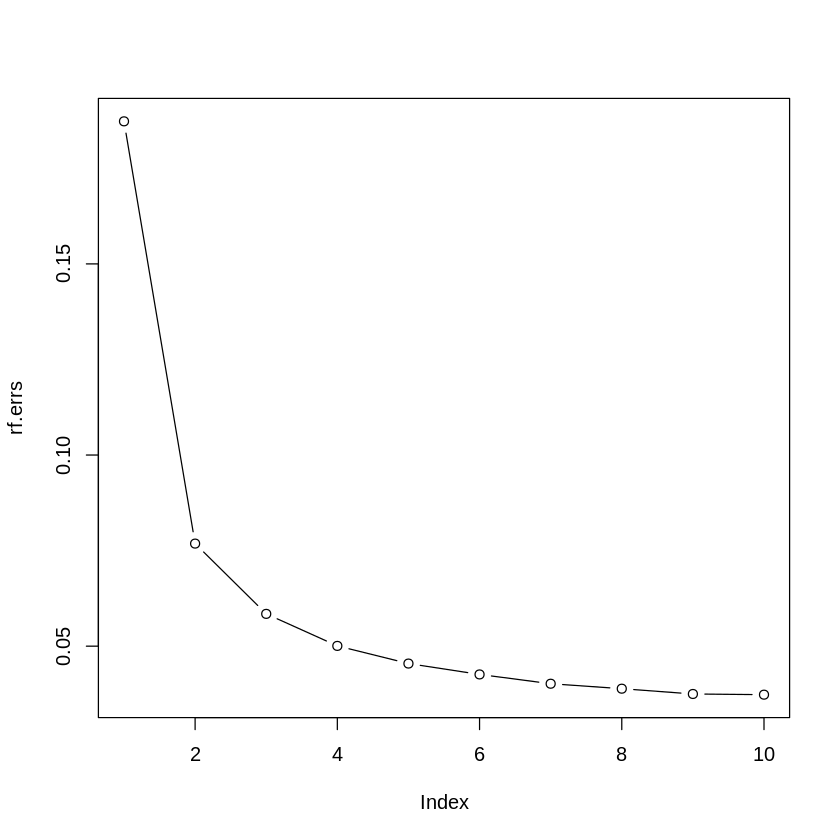

In [ ]:
## train parameter mtry
rf.errs <- rep(0, 10)

for (m in c(1:10)) {

rf.carseats <- randomForest(Cost~., train,mtry=m, importance=TRUE)

rf.pred <- predict(rf.carseats, newdata=test)

rf.errs[m] <- mean((rf.pred - test$Cost)^2)

}
plot(rf.errs, type="b")


In [ ]:
which.min(rf.errs) ## using mtry=10 for rf model

[1] 10

In [ ]:
rf = randomForest(Cost~., train,mtry=10, importance=TRUE)
rf.pred <- predict(rf.carseats, newdata=test)
mean((rf.pred - test$Cost)^2)

[1] 0.03731682

# XGBoost

In [ ]:
install.packages('xgboost')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('caret')
library('xgboost')

In [ ]:
train_xgb = trainControl(method = 'cv',number=5,search = 'grid', verboseIter = T)

In [ ]:
model <- train(Cost~.,data=train,method='xgbTree',trControl = train_xgb,tuneLength =5)

In [ ]:
model$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
247,100,5,0.3,0,0.8,1,1


In [ ]:
xgb_pred <- predict(model, test)
xgb_mse <- mean((xgb_pred - test$Cost)^2);
xgb_mse

[1] 0.03020969

# Lasso and Ridge

In [ ]:
grid <- 10^seq(10, -2, length=100) # lambda sequence

In [ ]:
# Use 10-fold cross-validation to choose lambda for ridge
set.seed(1)
x_train = model.matrix(Cost~.-1,train)
x_test = model.matrix(Cost~.-1,test)
y_train = train$Cost
y_test = test$Cost

cv.out_ridge <- cv.glmnet(x_train, y_train, nfolds = 10,
family = 'gaussian', type.measure = 'mse',
standardize = T, lambda=grid, alpha=0)
#predict(ridge.mod, newx, s=50)

In [ ]:
ridge.mod <- glmnet(x_train, y_train, alpha=0, lambda=grid, standardize=T, intercept=FALSE)
ridge_pred = predict(ridge.mod, x_test, s=cv.out_ridge$lambda.min)
ridge_mse = mean((ridge_pred - y_test)^2);ridge_mse

[1] 0.2507834

In [ ]:
cv.out_lasso <- cv.glmnet(x_train, y_train, nfolds = 10,
family = 'gaussian', type.measure = 'mse',
standardize = T, lambda=grid, alpha=1)

lasso.mod <- glmnet(x_train, y_train, alpha=1, lambda=grid, standardize=T, intercept=FALSE)
lasso_pred = predict(lasso.mod, x_test, s=cv.out_lasso$lambda.min)
lasso_mse = mean((lasso_pred - y_test)^2);lasso_mse

[1] 0.2563965